<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week3%20-%20Pandas%20-%20Data%20Cleaning/walkthroughs/Introduction_to_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#@title Introduction to EDA - Lab 3

%%html

<div>
<td> 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

# Web scrapping - Part 0
>The goal of this Walkthrough is to provide you with insights on exploratory data analysis throughout the use of a fun and interactive technique known as webscrapping. During this laboratary, you will be provided with a broad overview of this technique as well as the major tools used in the process. You will also understand how data analysis can be conducted on real-time web data and hopefully see how this combination can be further applied to any other context. 


>In essence, webscrapping consits in harvesting the content of a web page in order to process its information for further use. In our example, webscrapping is used as fun way to extract data that we will analyse afterwards. In most cases, this thechniques comes hand in hand with data cleaning and data analysis. For futher information on webscrapping, click on the following [link](https://en.wikipedia.org/wiki/Web_scraping).


## Web scrapping with Pandas

>Last week you were introduced with Pandas library and its DataFrame. Many different functions were presented to you for Dataframe manipulation. You should have noticed by now that this is a really usefull library when it comes to using tables. More over, one of the perks of using this Pandas is that you can diretly scrap HTML tables from the web... Lets dive into it.

> The main function we are going to be using is `read_html`, it allows you the directly put the data of webpage table into a DataFrame. For more information, just click on this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html). 

For example, imagine we wanted to demonstrate the importance of the reserch department for the future of a company, we would have at some point to provide evidences for such statment. To that end, lets get the [top 50 companies](https://en.wikipedia.org/wiki/List_of_companies_by_research_and_development_spending) with the highest research and development expenses in 2018.

In [9]:
import pandas as pd

In [10]:
pd.read_html('https://en.wikipedia.org/wiki/List_of_companies_by_research_and_development_spending')[0]



,Rank,Company,Country,Sector,Expenditures on R&D (billions of US$)
0,1,Amazon,United States,Software and Internet,22.62
1,2,Alphabet Inc.,United States,Software and Internet,16.23
2,3,Volkswagen Group,Germany,Automotive,15.77
3,4,Samsung Electronics,South Korea,Computing and Electronics,15.31
4,5,Microsoft,United States,Software and Internet,14.74
5,6,Huawei,China,Computing and Electronics,13.60
6,7,Intel,United States,Computing and Electronics,13.10
7,8,Apple Inc.,United States,Computing and Electronics,11.58
8,9,Roche Holding,Switzerland,Health Care,10.80
9,10,Johnson & Johnson,United States,Health Care,10.55


## Web Scrapping libraries

In order to get the data from the Web with Python, we will require during the course of this lab to use the follwing two essential libraries:

*  Requests (HTTP): retreives the web pages (html) to parse.

*  Beautiful Soup (HTML Parsing): parses the html.

Thanks to google colab, no specific environmental installation is needed to work on this lab. We can directly import the need libraries. 
Moreover, last week you were introduced with a very important library when it comes to EDA known as [Pandas](https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html). Dataframes and the allowed manipulations come in very handy for the analysis we shall conduct on the newly fetched Data. Therefore, we will continue using this library throughout this lab as well. If you feel like you are still not at ease with Pandas basic concepts, please refer to the previous documentation or ask one of the TAs. 


In [11]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re 


## Retreiving the Data


>In order to get started with webscrapping we must first make a [request](https://requests.readthedocs.io/en/master/user/quickstart/). In simple words, we will ask the server hosting the webpage we are interested in for its content.

> In this laboratory, we will use the [Boat24.ch](https://www.boot24.ch/chde/motorboote/furtif-28-modele-unique/detail/463101/) by specifying its URL as parameter to the ``requests.get`` method. 

> We can check the status of our request using the library method ``status_code``. You can find more on the HTTP status code on this [link](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes). A code of **200** means the HTTP request was successfuly completed. On the other hand, the response header display metadata aboug the request itself. You can see for yourself the details of the header running the next cell. 



In [12]:
# Make the request
r = requests.get('https://www.bateau24.ch/chfr/bateauxamoteur/furtif-28-modele-unique/detail/463101/')
# Response content
print('Response status code: {0}\n'.format(r.status_code))
print('Response headers: {0}\n'.format(r.headers))


Response status code: 200

Response headers: {'Date': 'Tue, 02 Mar 2021 17:49:33 GMT', 'Server': 'Apache', 'Expires': '0', 'Cache-Control': 'private, post-check=0, pre-check=0, max-age=0', 'Pragma': 'no-cache', 'X-Frame-Options': 'deny', 'Set-Cookie': 'domaincheck=1; expires=Wed, 02-Mar-2022 17:49:33 GMT; Max-Age=31536000; path=/; domain=.bateau24.ch, lan=chfr; expires=Wed, 02-Mar-2022 17:49:33 GMT; Max-Age=31536000; path=/; domain=.bateau24.ch, data=a%3A1%3A%7Bs%3A3%3A%22cat%22%3Ba%3A1%3A%7Bi%3A2%3Bi%3A1%3B%7D%7D; expires=Wed, 02-Mar-2022 17:49:33 GMT; Max-Age=31536000; path=/; domain=.bateau24.ch', 'Upgrade': 'h2', 'Connection': 'Upgrade, Keep-Alive', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Content-Length': '12006', 'Keep-Alive': 'timeout=4, max=256', 'Content-Type': 'text/html; charset=utf-8'}



Now, lets see the raw content of our request. The body of the response here will be in HTML since we are asking for a webpage. Different format such as  JSON or XML could also be imagined for web services.

In [13]:
print('Response body: {0}'.format(r.text))


Response body: <!doctype html>
<html class="no-js" lang="fr" data-lan="chfr">
<head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<title>Furtif 28, modèle unique., 2020, 2h, CHF 295.000,- | bateau24.ch</title>
<meta name="keywords" content="furtif 28, mod&egrave;le unique.,bateau &agrave; console centrale,bateau &agrave; moteur,nouveau bateau disponible en stock,acheter" />
<meta name="description" content="Furtif 28, mod&egrave;le unique. acheter - Ann&eacute;e de fabrication: 2020, Longueur: 9.00 m, Largeur: 2.80 m - Suivez ce lien pour plus de details, photos, informations et coordonnées : bateau24.ch (ID: 463101)" />
<meta name="revisit-after" content="1 days" />
<meta name="page-topic" content="Bateaux d'occasion, Bateaux" />
<meta name="page-type" content="Annonces, Petites annonces" />
<meta name="audience" content="all" />
<meta name="publisher" content="bateau24.ch" />
<meta name="copyright" content="bateau24.ch" />
<meta name="distribution" con

## Parsing the Data

Now as you can see, the HTTP response's body as it is, is hardly usable. Therefore, we rely on BeautifulSoup to parse the content to for further processings. Thus, we specify we need the html.parser. For more information, you can click [here](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser)

BeatifulSoup, thanks to parsing the content, will allow us to conduct a series of different operations and commands that you will be discovering in the remaining part of this lab. Note that this library can be very powerfull and complete when it comes to parsing and manipulations, this overview is not meant to display all possible features offered by BeautifulSoup.


In [14]:
page_body = r.text
soup = BeautifulSoup(page_body, 'html.parser')


For instance, you can very easily get the title of the page using ``soup.title``.

In [15]:
soup.title


<title>Furtif 28, modèle unique., 2020, 2h, CHF 295.000,- | bateau24.ch</title>

Yet, this is stil in HTML format, therefore using the ``.string`` allows for a more conventional layout.

In [16]:
soup.title.string


'Furtif 28, modèle unique., 2020, 2h, CHF 295.000,- | bateau24.ch'

To go further with this laboratory and with Data retreival after parsing, some html notions are required. In essence, you should get acquainted with concepts like **HTML tags**. Several functions and manipulations allowed by beautifulSoup rely on the different tags (headers,divisions, paragraphs, classes, ids etc..) to retreive the data they contain. You can find more on HTML tags [here](https://www.w3schools.com/html/html_elements.asp).

**Important** : All the manipulations that are performed bellow rely on a study of the HTML body of the repsonse. As it is specific to the website, it is fundamental to understand how to retreive the information and how where to get it from.  

In the next cell, we use the "`a`" tag as it is generally used for website links embedding (combined with ``href``). 

``soup.find`` and ``soup.find_all`` will be extensively in this lab to navigate the data structure, please do not hesitate to refere to the correpsonding  [documentation](https://https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for more information.


In [17]:
links = soup.find_all('a')
print('The webpage cointains {0} links...'.format(len(links)))

The webpage cointains 141 links...


Analysis of the body can also allow us to easily retreive the purchase price. 

In [18]:
price = soup.find_all('span',class_="list__value list__value--large")
price[0].text

'CHF 295.000,-'

Another usefull concept of html on wich BeautifulSoup relies is the notion of children. In fact, in HTML, tags are often assembled as a serie of containers each containg other tags. It is typical of a documented object model structure, you can find more clicking on this link : [DOM](https://www.w3schools.com/whatis/whatis_htmldom.asp).

Inspecting the page and using this notion led to the following commands to retreive the advertisment metadata. 

In [19]:
t=soup.find("ul",class_="list list--space-8")

for child in t.children:
    print(child.text)

Identifiant: 463101
Publiée le: 08.02.2021
Nombre de vues depuis 7 jours: 546
Dans les favoris: de 1 personnes


Similarly, you can also retreive and display articles with their links worth consulting as they are similar to the boat we seem to be interested in. 

In [20]:
t = soup.find_all("div", class_="blurb__link-area js-link")
for link in t:
    link_ = link.findAll('a', attrs={'href': re.compile("^https://")})
    print( "Item : {0}, Link : {1}".format( link_[0].text,link_[0].get('href') ))
        

Item : Chris Craft Catalina 30, Link : https://www.bateau24.ch/chfr/bateauxamoteur/chris-craft/chris-craft-catalina-30/detail/463495/
Item : De Antonio Yachts D34 Cruiser, Link : https://www.bateau24.ch/chfr/bateauxamoteur/de-antonio-yachts/de-antonio-yachts-d34-cruiser/detail/435166/
Item : Nuova Jolly Prince 38 CC, Link : https://www.bateau24.ch/chfr/bateauxamoteur/nuova-jolly/nuova-jolly-prince-38-cc/detail/463424/
Item : De Antonio Yachts D28 Open, Link : https://www.bateau24.ch/chfr/bateauxamoteur/de-antonio-yachts/de-antonio-yachts-d28-open/detail/330366/


Now, we are interesting in getting the description for our boat, to that end, we first retreived the according section in the page. 

In [21]:
informations = soup.find_all("ul",class_="list l-mt-16")
informations


[<ul class="list l-mt-16">
 <li><span class="list__value">9.00 m x 2.80 m</span><span class="list__key">longueur x largeur</span></li>
 <li><span class="list__value">1.00 m</span><span class="list__key">tirant d'eau</span></li>
 <li><span class="list__value">2'200 kg</span><span class="list__key">déplacement</span></li>
 <li><span class="list__value">C - Eaux côtières</span><span class="list__key">catégorie de conception ce</span></li>
 <li><span class="list__value">Bois</span><span class="list__key">matériau</span></li>
 </ul>, <ul class="list l-mt-16">
 <li><span class="list__value">8 personnes</span><span class="list__key">nombre de personnes admises</span></li>
 <li><span class="list__value">1 cabine</span><span class="list__key">nombre de cabines</span></li>
 <li><span class="list__value">1 couchette</span><span class="list__key">nombre de couchettes</span></li>
 <li><span class="list__value">50 l Eau</span><span class="list__key">réservoir d'eau douce</span></li>
 </ul>, <ul clas

Each part can be separatly processed. We can choose to view the first 5 characteristics. 

In [22]:
[description,description2,description3]= informations[0],informations[1],informations[2]
description

<ul class="list l-mt-16">
<li><span class="list__value">9.00 m x 2.80 m</span><span class="list__key">longueur x largeur</span></li>
<li><span class="list__value">1.00 m</span><span class="list__key">tirant d'eau</span></li>
<li><span class="list__value">2'200 kg</span><span class="list__key">déplacement</span></li>
<li><span class="list__value">C - Eaux côtières</span><span class="list__key">catégorie de conception ce</span></li>
<li><span class="list__value">Bois</span><span class="list__key">matériau</span></li>
</ul>

In [23]:
list__value =description.find_all("span", class_="list__value")
list__key =description.find_all("span", class_="list__key")
  

In [24]:
list__value

[<span class="list__value">9.00 m x 2.80 m</span>,
 <span class="list__value">1.00 m</span>,
 <span class="list__value">2'200 kg</span>,
 <span class="list__value">C - Eaux côtières</span>,
 <span class="list__value">Bois</span>]

Here comes Pandas and its Dataframes. We put the information in a two column Dataframe that could be further used. 

In [25]:

specs = pd.DataFrame(data={
     'list__key': list__key,'list__value': list__value})

In [26]:
specs

,list__key,list__value
0,[longueur x largeur],[9.00 m x 2.80 m]
1,[tirant d'eau],[1.00 m]
2,[déplacement],[2'200 kg]
3,[catégorie de conception ce],[C - Eaux côtières]
4,[matériau],[Bois]


For processing purposes, we get rid of the braquets, it is trickier than it looks as the dtype of the dataframe is not ``string``. You can investigate the innerworkings of this command to feel more comfertable with the output. 

In [27]:
specs.list__key=specs.list__key.apply(lambda x: re.search('>(.*)<',str(x)).group(1) )


In [28]:
specs

,list__key,list__value
0,longueur x largeur,[9.00 m x 2.80 m]
1,tirant d'eau,[1.00 m]
2,déplacement,[2'200 kg]
3,catégorie de conception ce,[C - Eaux côtières]
4,matériau,[Bois]


In [29]:
list__value =description2.find("span", class_="list__value")
list__key =description2.find_all("span", class_="list__key")
specs2 = pd.DataFrame(data={'list__value': list__value,
     'list__key': list__key})

In [30]:
list__value =description3.find("span", class_="list__value")
list__key =description3.find_all("span", class_="list__key")
specs3 = pd.DataFrame(data={'list__value': list__value,
     'list__key': list__key})

In [31]:
concatenated = pd.concat([specs,specs2,specs3])

concatenated

,list__key,list__value
0,longueur x largeur,[9.00 m x 2.80 m]
1,tirant d'eau,[1.00 m]
2,déplacement,[2'200 kg]
3,catégorie de conception ce,[C - Eaux côtières]
4,matériau,[Bois]
0,[nombre de personnes admises],8 personnes
1,[nombre de cabines],8 personnes
2,[nombre de couchettes],8 personnes
3,[réservoir d'eau douce],8 personnes
0,[propulsion],Hors-bord 4 temps


**Advanced**

Now, we use a different approach to get all the characteristics at once. Yet, there is one odd piece of Data in our Dataframe, can you notice it ? 

In [32]:

list__value =soup.find_all("span", class_="list__value")
list__key =soup.find_all("span", class_="list__key")
furn = pd.DataFrame(data={'list__value': list__value,
     'list__key': list__key})
furn.list__value=furn.list__value.apply(lambda x: re.search('>(.*)<',str(x)).group(1) )
furn.list__key=furn.list__key.apply(lambda x: re.search('>(.*)<',str(x)).group(1) )

In [33]:
furn.head()

,list__value,list__key
0,"CHF 295.000,-",
1,2020,année de fabrication
2,neuf,état
3,9.00 m x 2.80 m,longueur x largeur
4,1.00 m,tirant d'eau


In [34]:
furn[1:]

,list__value,list__key
1,2020,année de fabrication
2,neuf,état
3,9.00 m x 2.80 m,longueur x largeur
4,1.00 m,tirant d'eau
5,2'200 kg,déplacement
6,C - Eaux côtières,catégorie de conception ce
7,Bois,matériau
8,8 personnes,nombre de personnes admises
9,1 cabine,nombre de cabines
10,1 couchette,nombre de couchettes


## Scrapping exercise 

Now, we want you to exercise your scrapping skills to rapidly retreive [the list of countries by unemployment rate.]('https://en.wikipedia.org/wiki/List_of_countries_by_unemployment_rate')

In [35]:
#To be hidden   
pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_unemployment_rate')[2]

,Country,Unemployment rate (%),Source / date of information
0,Afghanistan,11.2,2020 (June)[4]
1,Albania,11.9,2020 (Q2)[5]
2,Algeria,11.5,2020[4]
3,American Samoa (United States),18.0,2012[6]
4,Andorra,3.7,2016[7]
...,...,...,...
218,U.S. Virgin Islands (United States),8.8,2020[4]
219,Wallis and Futuna (France),8.8,2013[7]
220,Yemen,12.8,2020[4]
221,Zambia,11.4,2020[4]


# <a class="anchor"></a> 1. Exploratory Data Analysis





## <a class="anchor"></a> 1.1. Loading and getting a first look at our Data 


In [36]:
#Let's import pandas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


The dataset we will use is available under the following url :`'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD'`. This dataset containts the results of restaurant inspections in NYC.

In [93]:
#You should already know what this block of code does. Ignore the arguments after url for now
restaurants = pd.read_csv('https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD')

#Let's have a look at the data
restaurants.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50072759,GFG BAKERY,Manhattan,39,BEEKMAN STREET,10038.0,2123443465,"Cakes, Cupcakes, Desserts",10/10/2019,Violations were cited in the following area(s).,02H,Food not cooled by an approved method whereby ...,Y,24.0,NaN,NaN,03/01/2021,Cycle Inspection / Initial Inspection,40.710274,-74.005490,101.0,1.0,1501.0,1001284.0,1.000930e+09,MN25
1,50064392,PATIALA GRILL,Manhattan,371,WEST 34 STREET,10001.0,2125648255,Indian,06/11/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,34.0,NaN,NaN,03/01/2021,Cycle Inspection / Initial Inspection,40.752969,-73.995304,104.0,3.0,11100.0,1013555.0,1.007580e+09,MN13
2,50001693,ANKA GRILL,Manhattan,642,LEXINGTON AVENUE,10022.0,6466926494,Turkish,10/19/2018,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Y,33.0,C,10/19/2018,03/01/2021,Cycle Inspection / Re-inspection,40.759237,-73.970368,105.0,4.0,10000.0,1071461.0,1.013098e+09,MN19
3,50018652,KIABACCA PIZZA AND BEER,Manhattan,639,10 AVENUE,10036.0,2126494675,American,04/17/2019,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,12.0,A,04/17/2019,03/01/2021,Cycle Inspection / Initial Inspection,40.761758,-73.993928,104.0,3.0,12900.0,1026940.0,1.010740e+09,MN15
4,50012356,TEXAS CHICKEN & BURGERS,Manhattan,151,EAST 103 STREET,10029.0,9173304730,Chicken,05/03/2018,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Y,12.0,A,05/03/2018,03/01/2021,Cycle Inspection / Initial Inspection,40.790198,-73.947393,111.0,8.0,16600.0,1051915.0,1.016310e+09,MN33


Let's use the `.describe()` function to get a quick overview of the Data we will be working with.


In [94]:
restaurants.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,3.960220e+05,389325.000000,377310.000000,394597.000000,394597.000000,388022.000000,388022.000000,388022.000000,3.862060e+05,3.945970e+05
mean,4.622461e+07,10679.809704,20.112738,40.049936,-72.711204,248.388287,20.056102,28750.317500,2.509389e+06,2.395162e+09
std,4.393569e+06,602.240918,14.730377,5.213847,9.465309,130.398593,15.828921,30522.905127,1.349104e+06,1.344780e+09
min,3.007544e+07,10000.000000,-1.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,4.140500e+07,10022.000000,11.000000,40.685173,-73.989201,105.000000,4.000000,7800.000000,1.042824e+06,1.010360e+09
50%,5.000901e+07,10468.000000,15.000000,40.732084,-73.958111,301.000000,20.000000,16100.000000,3.007692e+06,3.001640e+09
75%,5.005960e+07,11229.000000,26.000000,40.761562,-73.898493,401.000000,34.000000,40300.000000,4.001953e+06,4.001350e+09
max,5.010899e+07,30339.000000,164.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


## <a class="anchor"></a> 1.2. Dtypes and descriptive statistics

Recall from week2 that there are different dtypes in Pandas. Have a look at this table once again:


| Pandas dtype  | Python type  | NumPy type|Usage
| :--- | :--- | :--- | :--- |
| object| str or mixed | string_, unicode_, mixed types| Text or mixed numeric and non_numeric values |
| int 64| int| int_, int8, int16, int32, int64, uint8, uint18, uint32, uint64 | Integer numbers i.e. [1,2,3,...] |
| float64| float| float_, float15, float32, float64 | Floating point numbers (They contain decimal points) |
| bool| bool|bool_| True/False values|
| datetime64 | NA | datetime64[ns]     | Date and time values  |
| timedelta[ns] | NA  | NA| Differences between two datetime|
| category | NA| NA| Finite list of text values|


Now let's see what the dtypes of our DF are:


In [95]:
restaurants.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
dtype: object

### <a class="anchor"></a> 1.2.1 Descriptive Statistics for numerical variables
 All our colums are `object` type. We will use the `pd.to_numeric()` function to convert some of the columns to `float64` type and see if the `.describe()` funciton can give us some more useful statistical information.

In [96]:
#Describe the SCORE column
restaurants.SCORE.describe()

count    377310.000000
mean         20.112738
std          14.730377
min          -1.000000
25%          11.000000
50%          15.000000
75%          26.000000
max         164.000000
Name: SCORE, dtype: float64

We can use the `.hist()` function to plot an histogram and get a better look at our data.

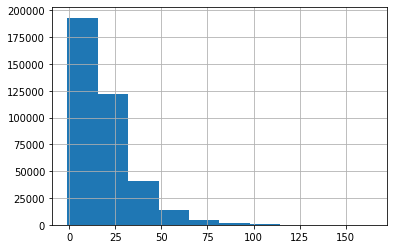

In [97]:
restaurants["SCORE"].hist()

The `hist()` function allows to pass multiple arguments, you can find more information if you follow this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)


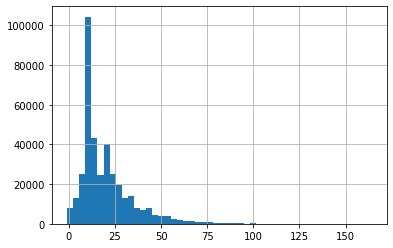

In [42]:
restaurants["SCORE"].hist(bins = 50)

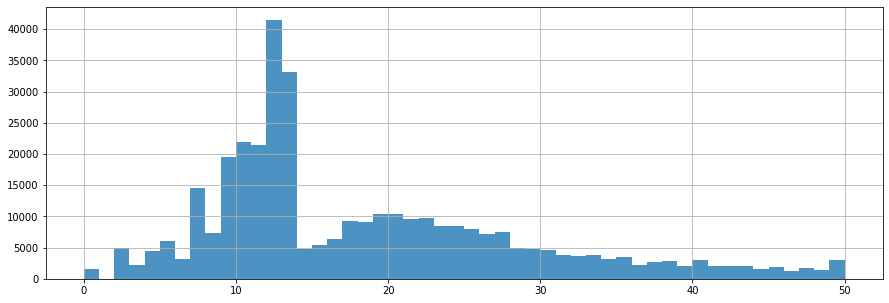

In [43]:
# A quick exposure to various options of the "hist" command 
restaurants.SCORE.hist(bins=50, # use 50 bars
                          range=(0,50), # x-axis from 0 to 50
                          density=False,  # show normalized count (density=True), or raw counts (density= False)
                          figsize=(15,5), # controls the size of the plot
                          alpha = 0.8 # make the plot 20% transparent
                         )

We now have some statistical information for the SCORE column. Let's convert some other columns to a more useful type.

### <a class="anchor"></a> 1.2.2 Descriptive statistics for DATETIME variables


Remember that one of the dtypes handles Date and Time. Some of the columns in our DF contain this type of data, so let's convert these columns to the `datetime64` dtype.


In [44]:
restaurants["GRADE DATE"].head(10)

0           NaN
1           NaN
2    10/19/2018
3    04/17/2019
4    05/03/2018
5    11/01/2019
6    12/03/2018
7           NaN
8    03/04/2020
9           NaN
Name: GRADE DATE, dtype: object

For that, we need to understand first how to parse dates using the [Python conventions.](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) 

The relevant entries from the table are:

    %m Month as a zero-padded decimal number.
    %d Day of the month as a zero-padded decimal number.
    %Y Year with century as a decimal number.

Now that we know in what format the dates were entried (remember that americans write dates like this `month/day/year` , as opposed to `day/month/year`), we can convert our columns.

In [98]:
#We convert some columnd to the datetime64 tyoe
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

#Now we have another look at the dtaypes
restaurants.dtypes

CAMIS                             int64
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                         float64
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                        float64
Longitude                       float64
Community Board                 float64
Council District                float64
Census Tract                    float64
BIN                             float64
BBL                             float64


Let's see what the `.describe()` function can do now.

In [99]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe(datetime_is_numeric=True)

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,396022,197675,396022
mean,2017-08-26 10:03:53.841440256,2018-09-16 19:10:05.047770880,2021-02-28 23:59:59.990391296
min,1900-01-01 00:00:00,2011-05-27 00:00:00,2021-03-01 00:00:00
25%,2017-12-28 00:00:00,2018-01-11 00:00:00,2021-03-01 00:00:00
50%,2018-10-24 00:00:00,2018-10-23 00:00:00,2021-03-01 00:00:00
75%,2019-07-11 00:00:00,2019-07-03 00:00:00,2021-03-01 00:00:00
max,2021-02-26 00:00:00,2020-12-31 00:00:00,2021-03-01 00:00:00


We can also plot an histogram for datetime variables:

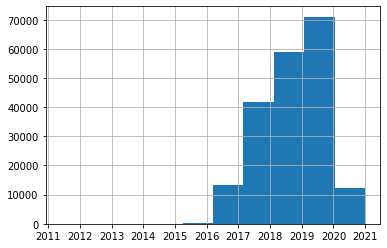

In [104]:
restaurants["GRADE DATE"].hist()


### <a class="anchor"></a> 1.2.3 Descriptive statistics for categorical variables

Now let's handle categorical data. This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).

We can use the pandas `.Categorical` function for this.

In [48]:
#We convert the categorical columns
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)

#We have another look at the dtypes
restaurants.dtypes

CAMIS                             int64
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                         float64
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                        float64
Longitude                       float64
Community Board                 float64
Council District                float64
Census Tract                    float64
BIN                             float64
BBL                             float64


In [49]:
restaurants["DBA"].value_counts()[:10]

DUNKIN'                                  4149
SUBWAY                                   2944
STARBUCKS                                2130
MCDONALD'S                               1925
KENNEDY FRIED CHICKEN                    1339
DUNKIN', BASKIN ROBBINS                  1165
CROWN FRIED CHICKEN                      1106
BURGER KING                              1032
POPEYES                                   949
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     780
Name: DBA, dtype: int64

An explanation:
 * The `value_counts()` function counts how many different values there are.
 * The `[:10]` filters the list, thus showing us only the first 10 values.  


 

In [50]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5]

American                                      81633
Chinese                                       41595
Pizza                                         25393
Café/Coffee/Tea                               19591
Latin American (Central and South America)    17301
Name: CUISINE DESCRIPTION, dtype: int64

We can also plot the data, lets start by plotting the different categories of food with the `.plot()` function.

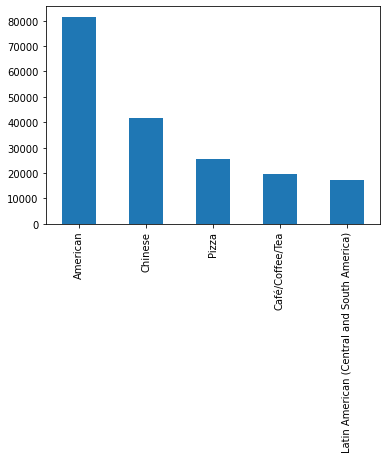

In [51]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5].plot(kind='bar')

In [52]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular

American                                      81633
Chinese                                       41595
Pizza                                         25393
Café/Coffee/Tea                               19591
Latin American (Central and South America)    17301
                                              ...  
Iranian                                          68
Czech                                            43
Nuts/Confectionary                               43
Chilean                                          32
Basque                                            9
Name: CUISINE DESCRIPTION, Length: 82, dtype: int64

If you have a look at the results of the last block of code, you will see that is seems to be quite detailed. We might for example want to treat "Cuban", "Dominican", "Puerto Rican", "South & Central American" just as "Latin American".

The `.replace()` function allows us to do this.

In [53]:
#Latin American food
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace=['Latin American (Central and South America)', 'Chilean'],
    value = 'Latin American',
    inplace=True
)

#Coffe bar
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='CafÃ©/Coffee/Tea',
    value = 'Cafe/Coffee/Tea',
    inplace=True
)

In [54]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular

American              81633
Chinese               41595
Pizza                 25393
Café/Coffee/Tea       19591
Latin American        17333
                      ...  
Fruits/Vegetables        80
Iranian                  68
Nuts/Confectionary       43
Czech                    43
Basque                    9
Name: CUISINE DESCRIPTION, Length: 81, dtype: int64

We can now plot the same barchart again, and see what the results are:



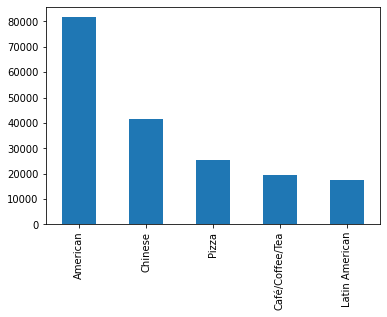

In [55]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:5].plot(kind='bar')

## <a class="anchor"></a> 1.3 Selecting Subsets




To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep

In [56]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice.head()

0    False
1    False
2    False
3    False
4    False
Name: VIOLATION CODE, dtype: bool

In [57]:
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called  has_mice

has_mice = restaurants[mice]
has_mice.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
12,50004512,TIO LUCA,Manhattan,421,MALCOLM X BOULEVARD,10037.0,2129399306,Spanish,2018-05-30,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,24.0,NaN,NaT,2021-03-01,Cycle Inspection / Initial Inspection,40.811703,-73.942626,110.0,9.0,22600.0,1058102.0,1.019160e+09,MN03
31,40539661,BAKE AND THINGS RESTAURANT,Brooklyn,184,EAST 35 STREET,11203.0,7188261807,"Caribbean (Inc. Cuban, Puerto Rican)",2017-10-05,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,33.0,NaN,NaT,2021-03-01,Cycle Inspection / Initial Inspection,40.650633,-73.944740,317.0,45.0,85600.0,3109425.0,3.048880e+09,BK91
34,41634837,ST MARKS KARAOKE,Manhattan,6,ST MARKS PLACE,10003.0,2122286250,"Bottled beverages, including water, sodas, jui...",2018-06-06,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,5.0,NaN,NaT,2021-03-01,Cycle Inspection / Initial Inspection,40.729317,-73.989389,103.0,2.0,3800.0,1006662.0,1.004630e+09,MN22
76,50102576,CANYON ROAD,Manhattan,1470,1 AVENUE,10075.0,2127341600,Mexican,2020-02-03,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,19.0,NaN,NaT,2021-03-01,Pre-permit (Operational) / Initial Inspection,40.770696,-73.953871,108.0,5.0,13200.0,1045948.0,1.014710e+09,MN31
103,50001526,EVERYDAY CHINESE RESTAURANT,Brooklyn,890,WYCKOFF AVENUE,11237.0,7183818899,Chinese,2020-01-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,28.0,NaN,NaT,2021-03-01,Cycle Inspection / Initial Inspection,40.697097,-73.906759,304.0,37.0,43900.0,3393933.0,3.033930e+09,BK77


In [58]:
# List the most frequent DBA values in the data of restaurants that have mice
has_mice["DBA"].value_counts()[:20]

SUBWAY                                   254
DUNKIN'                                  146
KENNEDY FRIED CHICKEN                    127
CROWN FRIED CHICKEN                      116
STARBUCKS                                 85
MCDONALD'S                                74
POPEYES                                   71
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     67
BURGER KING                               65
DUNKIN', BASKIN ROBBINS                   57
KFC                                       40
DOMINO'S                                  34
LITTLE CAESARS                            33
AMC THEATRES                              31
CARVEL ICE CREAM                          29
LE PAIN QUOTIDIEN                         24
PAPA JOHN'S                               22
VIVI BUBBLE TEA                           22
EMPANADAS MONUMENTAL                      21
INSOMNIA COOKIES                          21
Name: DBA, dtype: int64

In [59]:
has_mice["CAMIS"].value_counts()[:5]

50016943    13
50015263    13
50058969    12
50046623    12
41642251    12
Name: CAMIS, dtype: int64

And we can use more complex conditions.

In [60]:
#Restaurants in Brooklyn that have mices
mice_Brooklyn =  ( (restaurants["VIOLATION CODE"] == "04L") 
                    & (restaurants["BORO"] == "Brooklyn") )

has_mice_brooklyn = restaurants[mice_Brooklyn]
has_mice_brooklyn.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
31,40539661,BAKE AND THINGS RESTAURANT,Brooklyn,184,EAST 35 STREET,11203.0,7188261807,"Caribbean (Inc. Cuban, Puerto Rican)",2017-10-05,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,33.0,NaN,NaT,2021-03-01,Cycle Inspection / Initial Inspection,40.650633,-73.944740,317.0,45.0,85600.0,3109425.0,3.048880e+09,BK91
103,50001526,EVERYDAY CHINESE RESTAURANT,Brooklyn,890,WYCKOFF AVENUE,11237.0,7183818899,Chinese,2020-01-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,28.0,NaN,NaT,2021-03-01,Cycle Inspection / Initial Inspection,40.697097,-73.906759,304.0,37.0,43900.0,3393933.0,3.033930e+09,BK77
105,40513885,ANOPOLI FAMILY RESTAURANT,Brooklyn,6920,3 AVENUE,11209.0,7187483863,American,2017-01-10,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,11.0,NaN,NaT,2021-03-01,Cycle Inspection / Initial Inspection,40.635479,-74.026150,310.0,43.0,6800.0,3145627.0,3.058710e+09,BK31
137,50005180,J & B YUMMY PIZZA,Brooklyn,5507,5 AVENUE,11220.0,7184391105,Pizza,2018-01-25,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,25.0,NaN,NaT,2021-03-01,Cycle Inspection / Initial Inspection,40.642186,-74.013336,307.0,38.0,10000.0,3015006.0,3.008320e+09,BK34
154,41612487,LE PADDOCK,Brooklyn,1235,PROSPECT AVENUE,11218.0,7184350921,French,2018-04-03,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Y,16.0,B,2018-04-03,2021-03-01,Cycle Inspection / Re-inspection,40.652936,-73.976110,307.0,39.0,50202.0,3122532.0,3.052750e+09,BK40


In [61]:
has_mice_brooklyn["DBA"].value_counts()[:20]

CROWN FRIED CHICKEN                      69
DUNKIN'                                  32
BURGER KING                              31
SUBWAY                                   29
GOLDEN KRUST CARIBBEAN BAKERY & GRILL    27
KENNEDY FRIED CHICKEN                    21
KFC                                      18
PAPA JOHN'S                              14
DUNKIN', BASKIN ROBBINS                  13
STARBUCKS                                13
CAFE CREOLE                              12
COLD STONE CREAMERY                      12
TAQUERIA RESTAURANTE MI BARRIO           11
FISHERMAN'S COVE                         11
AUTHENTIC SZECHUAN                       11
RINCONCITO FAMILIAR MEXICAN CUISINE      11
COCO ROCO RESTAURANT                     11
DOUBLE DRAGON                            11
INDIAN KITCHEN                           10
ISLAND GROVE RESTAURANT                  10
Name: DBA, dtype: int64

## <a class="anchor"></a> 1.3 Exercice


In [62]:
# Use the .head() function on the "VIOLATION CODE" column
#restaurants["Your code here"]."Your code here"

In [63]:
#Use the .value_counts() function to count the number of occurences by violation code
#violation_counts = "Your code here"."Your code here"


In [64]:
#Have a look at the first 10 values
#violation_counts["Your code here" : "Your code here"]

In [65]:
#Plot the 20 violation codes ocurring the most
#"Your code here".plot(kind = 'bar')

## <a class="anchor"></a> 1.4 Missing data

Let's have a look at our missing data. We will write a function which counts the number of missing values per column, and then calculates the percentage of the total values that the missing values represent.


In [66]:
#We store this code as a function in order to use it again later on
def missing_values_calculation():

  #We store the number of missing values for every column
  total = restaurants.isnull().sum().sort_values(ascending=False)

  #We make a new column contaning the percentage of missing values 
  #out of the total number of values
  percent = (restaurants.isnull().sum()/restaurants.isnull().count()).sort_values(ascending=False)

  #We now make a DF containing these 2 values
  missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

  #And we print the DataFrame
  display(missing)

#We call the function
missing_values_calculation()

,Total,Percent
GRADE,201571,0.508989
GRADE DATE,198347,0.500848
SCORE,18712,0.047250
CRITICAL FLAG,11157,0.028173
VIOLATION DESCRIPTION,11157,0.028173
BIN,9816,0.024787
NTA,8000,0.020201
Census Tract,8000,0.020201
Community Board,8000,0.020201
Council District,8000,0.020201


### <a class="anchor"></a> 1.4.1 Dropping columns


The GRADE and GRADE DATE columns containt a lot of missing values (more than half the data is missing). 
We may want to drop these 2 columns as the missing data is too much. We can use the `.drop()` function for this, but we need to pass an additional argument to tell Pandas we want to drop a column and not a row. This argument is: `axis = 1`

In [67]:
restaurants.drop(["GRADE", 'GRADE DATE'], axis = 1)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50072759,GFG BAKERY,Manhattan,39,BEEKMAN STREET,10038.0,2123443465,"Cakes, Cupcakes, Desserts",2019-10-10,Violations were cited in the following area(s).,02H,Food not cooled by an approved method whereby ...,Y,24.0,2021-03-01,Cycle Inspection / Initial Inspection,40.710274,-74.005490,101.0,1.0,1501.0,1001284.0,1.000930e+09,MN25
1,50064392,PATIALA GRILL,Manhattan,371,WEST 34 STREET,10001.0,2125648255,Indian,2019-06-11,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,34.0,2021-03-01,Cycle Inspection / Initial Inspection,40.752969,-73.995304,104.0,3.0,11100.0,1013555.0,1.007580e+09,MN13
2,50001693,ANKA GRILL,Manhattan,642,LEXINGTON AVENUE,10022.0,6466926494,Turkish,2018-10-19,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Y,33.0,2021-03-01,Cycle Inspection / Re-inspection,40.759237,-73.970368,105.0,4.0,10000.0,1071461.0,1.013098e+09,MN19
3,50018652,KIABACCA PIZZA AND BEER,Manhattan,639,10 AVENUE,10036.0,2126494675,American,2019-04-17,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,12.0,2021-03-01,Cycle Inspection / Initial Inspection,40.761758,-73.993928,104.0,3.0,12900.0,1026940.0,1.010740e+09,MN15
4,50012356,TEXAS CHICKEN & BURGERS,Manhattan,151,EAST 103 STREET,10029.0,9173304730,Chicken,2018-05-03,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Y,12.0,2021-03-01,Cycle Inspection / Initial Inspection,40.790198,-73.947393,111.0,8.0,16600.0,1051915.0,1.016310e+09,MN33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396017,50097986,BAODEGA,Manhattan,7,WEST 20 STREET,10011.0,6463706034,Chinese,2019-11-14,Establishment Closed by DOHMH. Violations wer...,06D,"Food contact surface not properly washed, rins...",Y,32.0,2021-03-01,Pre-permit (Operational) / Re-inspection,40.739937,-73.991563,105.0,3.0,5400.0,1015497.0,1.008220e+09,MN13
396018,50016112,ANTOJITOS ECUATORIANOS,Brooklyn,3398,FULTON STREET,11208.0,7182770970,Latin American,2019-12-30,Violations were cited in the following area(s).,02H,Food not cooled by an approved method whereby ...,Y,13.0,2021-03-01,Cycle Inspection / Re-inspection,40.684208,-73.870173,305.0,37.0,118400.0,3092908.0,3.041490e+09,BK83
396019,41331156,ROOM MATE GRACE HOTEL,Manhattan,125,WEST 45 STREET,10036.0,2123542323,American,2017-04-28,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,22.0,2021-03-01,Cycle Inspection / Initial Inspection,40.757156,-73.983613,105.0,4.0,11900.0,1022637.0,1.009980e+09,MN17
396020,50044336,KING DRAGON 88,Manhattan,1548,MADISON AVENUE,10029.0,2123696788,Chinese,2017-04-24,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Y,10.0,2021-03-01,Cycle Inspection / Initial Inspection,40.792678,-73.950194,111.0,8.0,16800.0,1051506.0,1.016100e+09,MN33


As you can see, the "GRADE" and "GRADE DATE" columns are not a part of our DataFrame anymore.

### <a class="anchor"></a> 1.4.2 Fillna() and dropna()


For the remaining columns we may want to do three different things:
 * Replace the missing entries with a specific value
 * Either estimate a possible value using the median for example
 * Drop the row altogether.

 Remember that we can drop rows with `dropna()`. Another useful function is `fillna()`, this function allows us to replace missing values with a value we may want.

In [68]:
# Replacing missing values with a given value
#In this case we are going to assume that if the value is missing then there was no critical flag
restaurants['CRITICAL FLAG'].fillna("N", inplace = True)

# Replacing missing values with an estimation (median)
median = restaurants['SCORE'].median()
restaurants['SCORE'].fillna(median, inplace=True)

#Dropping the row, you should already know this one
restaurants['VIOLATION DESCRIPTION'].dropna()

#Let's see how many 
missing_values_calculation()



,Total,Percent
GRADE,201571,0.508989
GRADE DATE,198347,0.500848
VIOLATION DESCRIPTION,11157,0.028173
BIN,9816,0.024787
Community Board,8000,0.020201
NTA,8000,0.020201
Council District,8000,0.020201
Census Tract,8000,0.020201
VIOLATION CODE,7831,0.019774
ZIPCODE,6697,0.016911


# <a class="anchor"></a> 2 Boxplots and correlations

We will now change datasets. This dataset containts the compensation of the CEO's of different companies.


In [69]:
#Run this cell
url = "https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/CEO%20compensation.csv"
data = pd.read_csv(url) 
data.head(3) #only shows the first 3 rows

,Total Comp,Top 20,Wide Industry,Company,CEO,City of Birth,State of Birth,Age,Undergrad,UG Degree,UG Date,AgeOfUnder,Graduate,Grad Degree,MBA?,MasterPhd?,G_date,AgeOfGradu,YearsFirm,YearsCEO,Salary,Bonus,other,St_gains,Comp for 5 yrs,Stock owned,Sales,Profits,Return over 5 yrs,Industry,Industry Code
0,203020000.0,True,Travel,Walt Disney,Mr. Michael D Eisner,New York,NY,52,Denison U,BA,64.0,22.0,NaN,none,0,0,NaN,NaN,10,10,750000.0,NaN,9667.0,202261000.0,236771000.0,0.561,8865,779.5,17.0,Travel-hotelsrecreation,8
1,53110900.0,True,Financial,Travelers,Mr. Sanford I Weill,New York,NY,61,Cornell,BA,55.0,22.0,NaN,none,0,0,NaN,NaN,8,8,1018750.0,3030310.0,2161890.0,46900000.0,141605000.0,1.168,6797,950.0,28.0,Financial services-leasefinance,1
2,38675400.0,True,Insurance,Conseco,Mr. Stephen C Hilbert,Terre Haute,IN,48,NaN,NaN,NaN,NaN,NaN,none,0,0,NaN,NaN,15,15,250000.0,8287670.0,190570.0,29947100.0,51156100.0,2.842,2637,308.9,76.0,Insurance-lifehealth,4


In [70]:
# Run this cell to drop the rows where there are missing values
data.dropna(inplace=True)

## <a class="anchor"></a> 2.1 Boxplots

Pandas allows you to plot boxplots with your data. If you do not remember what a Boxplot is you can refresh your memory following this link. Essentially they allow to see the following elements:

* Minimum
* Maximum
* Median
* Quartiles
* Outliers

We will use the `.boxplot()` function to see how much the salaries and bonuses of CEO's can vary. What part of CEO's compensation can vary the most, which one varies the least? Which one has the biggest outliers?



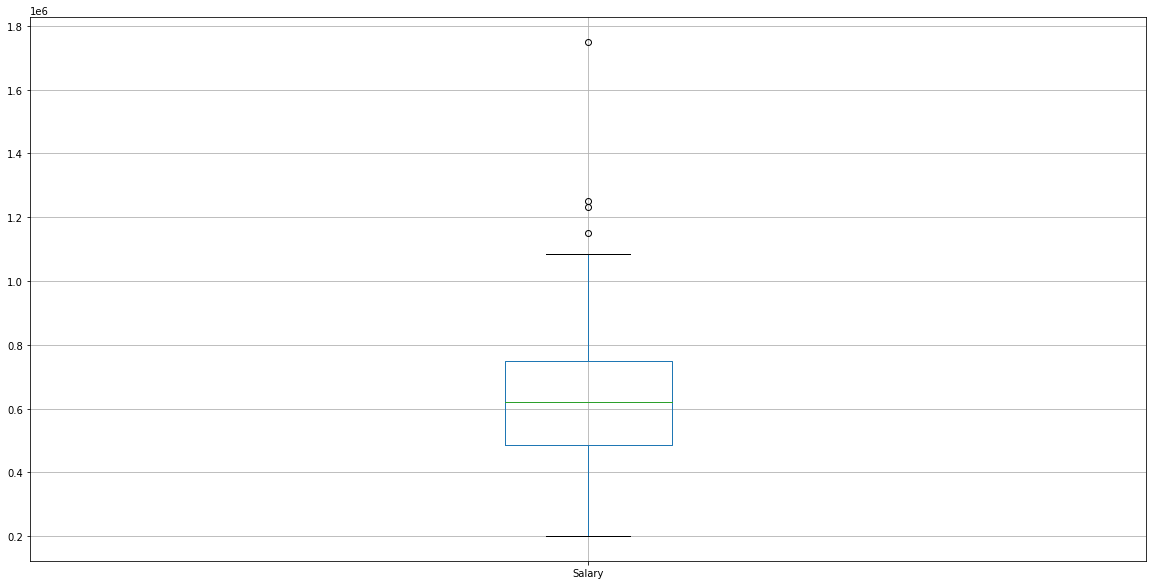

In [71]:
#Boxplot for salaries
display(data.boxplot(column = "Salary", figsize = (20,10)))



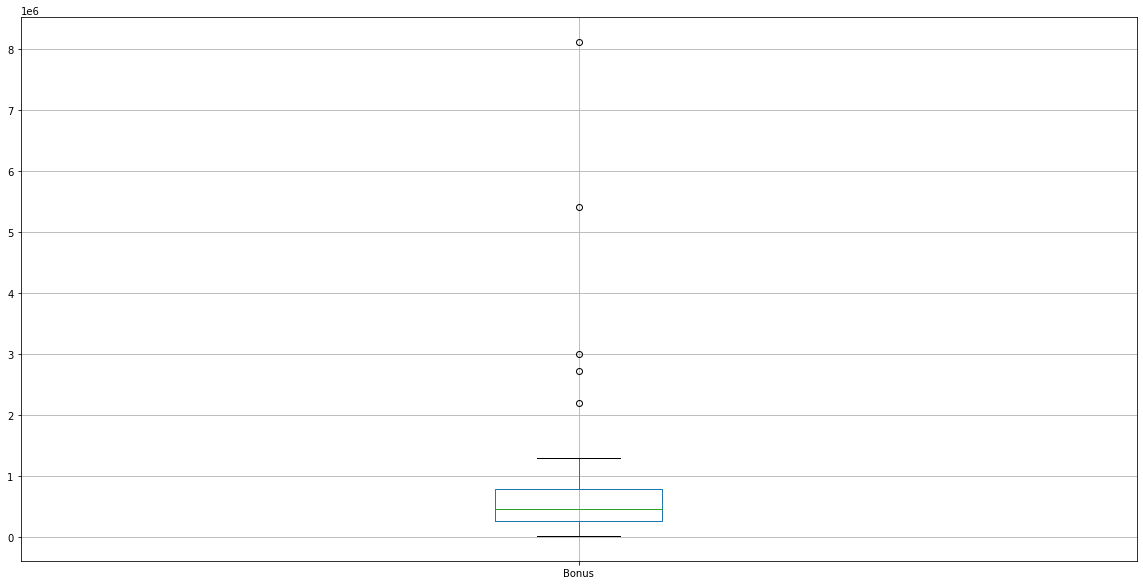

In [72]:
#Boxplot for bonuses
display(data.boxplot(column = "Bonus", figsize = (20,10) ))

### <a class="anchor"></a> 2.1.2 Boxplot exercice

Use the .boxplot function with the "Bonus" column. What is the mean, median, max, min and what are the outlier values?

Subsequentially check your answers using the .describe() function.


In [73]:
#Generate the Boxplot

In [74]:
#Check your answers

## <a class="anchor"></a> 2.1 Scatterplots and Correlation

This plots are useful to find correlations between variables. Let's see if we can find any correlation (visually) between the Age and the Salary of the CEO's.

The function's name is scatterplot and it is included in the sns library, it is therefore called like this:

`sns.scatterplot(x= Your_data_1, y= Your_data_2)`


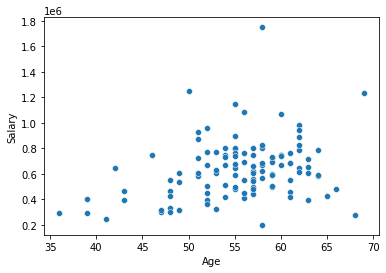

In [75]:
sns.scatterplot(x=data["Age"], y=data["Salary"])

Pandas also includes a function `corr` which allows to easily calculate [Pearsons r coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

In [76]:
data["Age"].corr(data["Salary"])

0.30571805690619325

The correlation seems quite low, so let's see what else we can find.

Usually, as a way to inentivize managers to do a good job, they are given stocks or options. This way, they have an intrinsic motivation to make the stock price grow, as they can benefit enormously from this. Let's see if we can find a correlation between the stock owned by a CEO and the return of the stock in the last 5 years.

Pearson's r coefficient is: 0.66


None

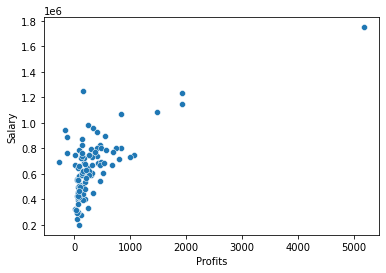

In [77]:
#Scatterplot
sns.scatterplot(x=data["Profits"], y=data["Salary"])

#Pearson's r coefficient
display(print("Pearson's r coefficient is: {}".format(round(data["Profits"].corr(data["Salary"]), 2))))


There seems to be a correlation between the fixed part of a CEO's  compensation and the companies profit, but always remember that correlation does not imply causation.

You can also include a third variable if you want to. In order to plot 3-different variables in 2 dimensions we can change the collor of the third variable. This is done with the `hue` argument.

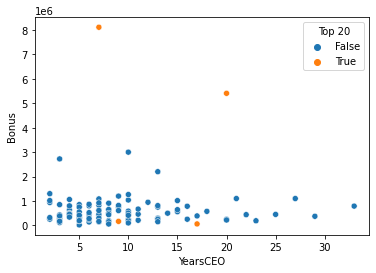

In [78]:
sns.scatterplot(x=data["YearsCEO"], y=data["Bonus"],hue=data["Top 20"])

## <a class="anchor"></a> 2.2 Exercice

1) Load the dataset from the following url: `https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/Birthweight.csv`, set ID as the index column and use the .head() funtion to obtain an overview.

In [86]:
birth_data = pd.read_csv("https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/Birthweight.csv")
birth_data.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


2) The above dataset contains information about newborn babis and their mothers. Plot an histogram of the "Gestation" column. What is the mode and the mean of the gestation period?

3) Plot a boxplot of the gestation period. Were you right about the mode and the median?

4) It might be interesting to see whether there is a correlation between smoker/ non-smoker mothers and the babies birthweight.

Plot a scatterplot between the "smoker", "Birthweight" and "mage" columns.

In [ ]:
#Check the correlation between each pair of variables

## <a class="anchor"></a> 2.3 Pairgrids and heatmaps

Pairgrids can be a usefool tool to visualize correlations. They allow us to plot the relationships of multiple variables against each other, 2 at a time.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x7fb6f2805610> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


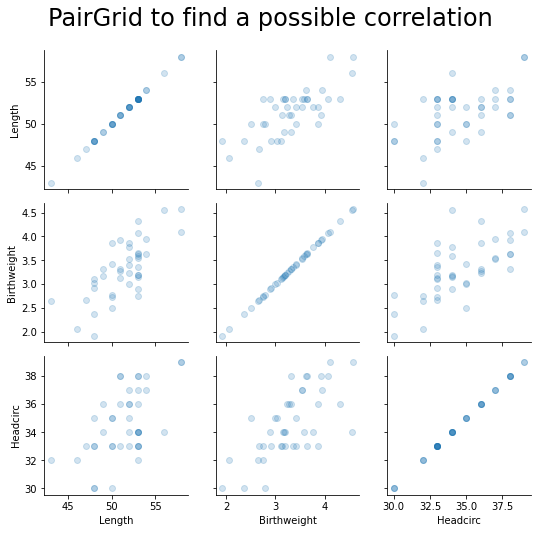

In [89]:
g = sns.PairGrid(birth_data, vars=['Length', 'Birthweight', 'Headcirc'],
                 palette='pale red')
g.map(plt.scatter, alpha=0.2)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('PairGrid to find a possible correlation', size=24)
g.add_legend();

#add heatmap

Another more useful tools are [heatmaps](https://en.wikipedia.org/wiki/Heat_map). By first calculating the correlations between every variable, we can then plot a heatmap of those.


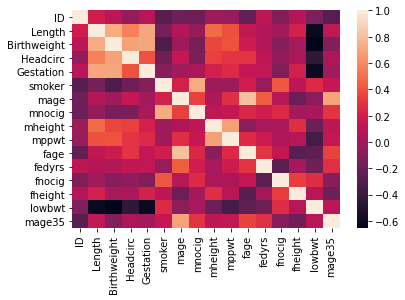

In [92]:
correlations = birth_data.corr()
sns.heatmap(correlations)